# Happiness and Income Analysis
**Abby Scarry and Nicole Davis**

[View Project](https://ascarry.github.io/)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/DataScienceProject/HappinessIncomeData.csv')


In [3]:
df.isnull().sum()

,0
Country name,0
year,0
Life Ladder,0
Log GDP per capita,28
Social support,13
Healthy life expectancy at birth,63
Freedom to make life choices,36
Generosity,81
Perceptions of corruption,125
Positive affect,24


In [4]:
df = df.drop(columns=['Unnamed: 11'])


In [5]:
# Interpolate missing values (trend)
df['Log GDP per capita'] = df['Log GDP per capita'].interpolate(method='linear')

In [6]:
# Use mean for other missing values
df['Social support'] = df.groupby('Country name')['Social support'].transform(lambda x: x.fillna(x.mean()))
df['Healthy life expectancy at birth'] = df.groupby('Country name')['Healthy life expectancy at birth'].transform(lambda x: x.fillna(x.mean()))
df['Freedom to make life choices'] = df.groupby('Country name')['Freedom to make life choices'].transform(lambda x: x.fillna(x.mean()))
df['Generosity'] = df.groupby('Country name')['Generosity'].transform(lambda x: x.fillna(x.mean()))
df['Perceptions of corruption'] = df.groupby('Country name')['Perceptions of corruption'].transform(lambda x: x.fillna(x.mean()))
df['Positive affect'] = df.groupby('Country name')['Positive affect'].transform(lambda x: x.fillna(x.mean()))
df['Negative affect'] = df.groupby('Country name')['Negative affect'].transform(lambda x: x.fillna(x.mean()))

In [7]:
df.isnull().sum()

,0
Country name,0
year,0
Life Ladder,0
Log GDP per capita,0
Social support,1
Healthy life expectancy at birth,50
Freedom to make life choices,0
Generosity,9
Perceptions of corruption,30
Positive affect,2


In [8]:
df.head(50)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.4510,50.500,0.718000,0.164000,0.882000,0.4140,0.2580
1,Afghanistan,2009,4.402,7.509,0.5520,50.800,0.679000,0.187000,0.850000,0.4810,0.2370
2,Afghanistan,2010,4.758,7.614,0.5390,51.100,0.600000,0.118000,0.707000,0.5170,0.2750
3,Afghanistan,2011,3.832,7.581,0.5210,51.400,0.496000,0.160000,0.731000,0.4800,0.2670
4,Afghanistan,2012,3.783,7.661,0.5210,51.700,0.531000,0.234000,0.776000,0.6140,0.2680
5,Afghanistan,2013,3.572,7.680,0.4840,52.000,0.578000,0.059000,0.823000,0.5470,0.2730
6,Afghanistan,2014,3.131,7.671,0.5260,52.300,0.509000,0.102000,0.871000,0.4920,0.3750
7,Afghanistan,2015,3.983,7.654,0.5290,52.600,0.389000,0.078000,0.881000,0.4910,0.3390
8,Afghanistan,2016,4.220,7.650,0.5590,52.925,0.523000,0.040000,0.793000,0.5010,0.3480
9,Afghanistan,2017,2.662,7.648,0.4910,53.250,0.427000,-0.123000,0.954000,0.4350,0.3710


In [9]:
df.sample(50)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1709,Portugal,2016,5.447,10.369,0.905,70.625,0.838,-0.231000,0.922,0.659,0.326
271,Brazil,2018,6.191,9.590,0.882,65.225,0.751,-0.123000,0.763,0.677,0.350
918,Indonesia,2019,5.347,9.381,0.802,62.800,0.866,0.549000,0.861,0.800,0.302
187,Belgium,2020,6.839,10.799,0.904,70.750,0.767,-0.172000,0.634,0.619,0.260
28,Albania,2021,5.255,9.588,0.702,69.150,0.827,0.039000,0.896,0.554,0.254
1564,Nigeria,2022,5.294,8.510,0.785,55.375,0.776,0.172000,0.935,0.760,0.253
239,Bosnia and Herzegovina,2018,5.887,9.566,0.836,67.150,0.659,0.118000,0.913,0.568,0.277
2248,Uruguay,2011,6.554,9.928,0.891,67.180,0.851,-0.093000,0.556,0.702,0.252
1573,North Macedonia,2015,4.976,9.625,0.766,65.300,0.660,-0.053000,0.824,0.551,0.299
1771,Saudi Arabia,2008,6.811,10.668,0.823,61.800,0.532,-0.024000,0.508,0.607,0.202


In [19]:
# Find average happiness score by country
avg_happiness = df.groupby('Country name')['Life Ladder'].mean().sort_values(ascending = False)
print(avg_happiness.sample(50))

Country name
Honduras                    5.494294
Morocco                     4.969769
Egypt                       4.437944
Japan                       6.023611
United Kingdom              6.889500
Costa Rica                  7.095444
Bulgaria                    4.751933
Burundi                     3.548200
Canada                      7.296833
Vietnam                     5.437556
Romania                     5.770353
Oman                        6.853000
Finland                     7.624062
Djibouti                    4.822500
Nepal                       4.840000
Norway                      7.463846
Cameroon                    4.664222
Guatemala                   6.257250
Malawi                      3.928000
Bangladesh                  4.609000
Sierra Leone                3.939067
New Zealand                 7.260706
Lesotho                     3.839800
Mauritius                   5.849600
Central African Republic    3.515000
Yemen                       3.862071
Iceland                  

The average happiness score based on country gives us an idea of the general wellbeing and happiness of the people in these countries.

In [23]:
# Find countries with the highest average happiness scores
happiest_countries = df.groupby('Country name')['Life Ladder'].mean().nlargest(5)
print("Top 5 happiest countries:")
print(happiest_countries)

Top 5 happiest countries:
Country name
Denmark        7.664111
Finland        7.624062
Iceland        7.468000
Norway         7.463846
Netherlands    7.440412
Name: Life Ladder, dtype: float64


The top five happiest countries using average happiness score shows which countries have the highest reported levels of happiness and in this case, they are primarily in northern Europe which is an interesting observation and poses the question of this region's correlation to happiness.

In [18]:
# Find average log GDP per capita score by country
avg_GDP = df.groupby('Country name')['Log GDP per capita'].mean().sort_values(ascending = False)
print(avg_GDP.sample(50))

Country name
Bosnia and Herzegovina     9.460938
Myanmar                    8.309417
Georgia                    9.403500
Sudan                      8.475600
Maldives                   9.893000
Madagascar                 7.336077
Zambia                     8.058176
Israel                    10.534278
Costa Rica                 9.829889
Canada                    10.756222
Greece                    10.325294
Ecuador                    9.302500
Kyrgyzstan                 8.432500
New Zealand               10.617882
Mongolia                   9.239125
Finland                   10.761062
Japan                     10.593333
Somaliland region          8.218000
Comoros                    8.058875
South Africa               9.516167
Burundi                    6.682200
Zimbabwe                   7.615278
China                      9.340647
Luxembourg                11.643462
Sweden                    10.822611
Moldova                    9.227333
Laos                       8.725417
Mali           

The average log GDP per capita shows the economic state of these countries and how they compare to eachother.

In [24]:
# Find the wealthiest countries using average log GDP per capita
wealthiest_countries = df.groupby('Country name')['Log GDP per capita'].mean().nlargest(5)
print("Top 5 wealthiest countries:")
print(wealthiest_countries)

Top 5 wealthiest countries:
Country name
Luxembourg     11.643462
Qatar          11.551800
Singapore      11.329031
Ireland        11.174588
Switzerland    11.125000
Name: Log GDP per capita, dtype: float64


The average log GDP per capita show the countries that are the weathiest or have the highest economic output per capita, reflecting that they have strong economies compared to the others.

In [21]:
# Caluclate correlation between happiness scores and log GDP
correlation = df[['Life Ladder', 'Log GDP per capita']].corr()
print({correlation.loc['Life Ladder', 'Log GDP per capita']})

{0.7722012597969026}


This correlation between happiness score and log GDP indicates a strong positive correlation, meaning as GDP per capita increases, generally so does the happiness score. This indicates that higher-income countries tend to report higher happiness, although the fact that it is not a perfect positive correlation confirms that this is not the only factor and non-economic factors can also influence happiness significantly. Overall, the data shows a positive relationship, but there are limitations.

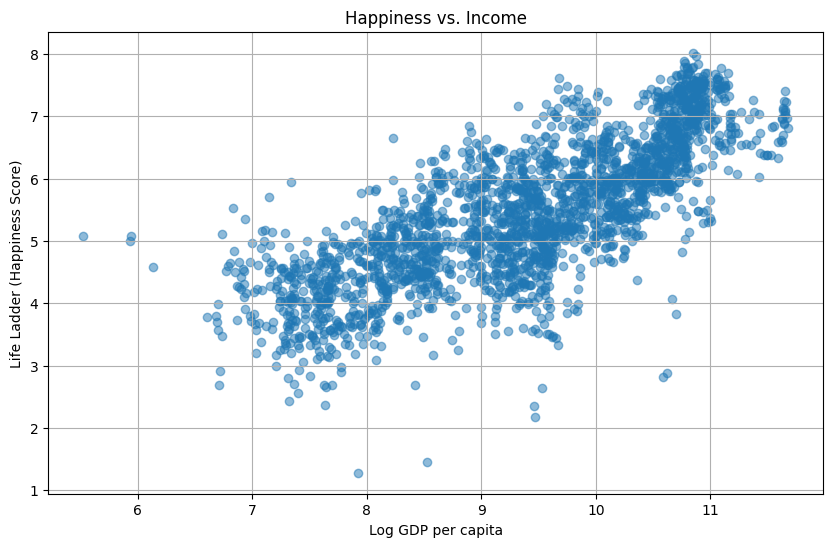

In [14]:
import matplotlib.pyplot as plt

# Scatter plot of happiness vs. income
plt.figure(figsize = (10, 6))
plt.scatter(df['Log GDP per capita'], df['Life Ladder'], alpha = 0.5)
plt.title('Happiness vs. Income')
plt.xlabel('Log GDP per capita')
plt.ylabel('Life Ladder (Happiness Score)')
plt.grid(True)
plt.show()

This scatterplot shows a positive, upward trend with income and happiness, representing that positive correlation. There is also alot of clustering at the top, where wealthier countries are reporting higher happiness scores. Some outliers can be seen showing lower income levels with high happiness levels.

In [10]:
%%shell
jupyter nbconvert --to html '/content/drive/My Drive/DataScienceProject/DataScienceProject.ipynb'

[NbConvertApp] Converting notebook /content/drive/My Drive/DataScienceProject/DataScienceProject.ipynb to html
[NbConvertApp] Writing 634902 bytes to /content/drive/My Drive/DataScienceProject/DataScienceProject.html
